In [123]:
%matplotlib inline
import os
from subprocess import call

import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'
import cmocean

from config_calc import *

import numpy as np
import xarray as xr

import plot_tools

ds = {}
for f in ['BkgC14','CFC11','pCFC11','CFC12','pCFC12','BombC14','C14']:
    dsi = xr.open_dataset('/glade/p/work/mclong/GLODAP/GLODAP_orig/%s.nc'%f)
    dsi = dsi.transpose('depth','latitude','longitude')    
    if ds:
        ds = xr.merge((ds,dsi))
    else:
        ds = dsi

ds

<xarray.Dataset>
Dimensions:     (depth: 33, latitude: 180, longitude: 360)
Coordinates:
  * longitude   (longitude) float64 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * latitude    (latitude) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * depth       (depth) float64 0.0 10.0 20.0 30.0 50.0 75.0 100.0 125.0 ...
Data variables:
    BkgC14      (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    BkgC14Err   (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    dz          (depth) float64 5.0 10.0 10.0 15.0 20.0 25.0 25.0 25.0 40.0 ...
    CFC11       (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    CFC11Err    (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    pCFC11      (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    pCFC11Err   (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    CFC12       (depth, latitude, longitude) float64 nan nan nan nan nan nan ...
    CFC12Err   

In [124]:
ds_tc = ds.sel(depth=slice(200.,600.)).mean(dim='depth')
ds_tc

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360)
Coordinates:
  * longitude   (longitude) float64 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * latitude    (latitude) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
Data variables:
    BkgC14      (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    BkgC14Err   (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    dz          float64 79.17
    CFC11       (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    CFC11Err    (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    pCFC11      (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    pCFC11Err   (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    CFC12       (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    CFC12Err    (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    pCFC12      (latitude, longitude) float64 nan nan nan nan nan nan nan ...
    pCFC12Err   (l

<xarray.DataArray 'BombC14' ()>
array(0.7640145619710287)


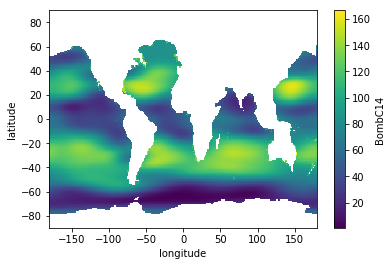

In [102]:
ds_tc.BombC14.plot()

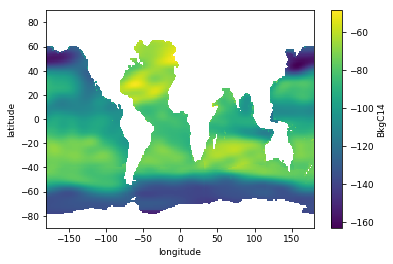

In [129]:
ds_tc.BkgC14.plot()

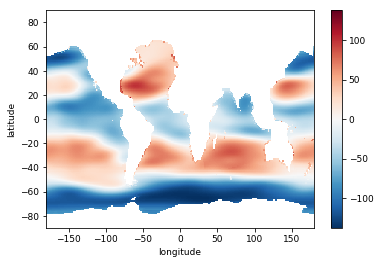

In [130]:
(ds_tc.BkgC14 + ds_tc.BombC14).plot()

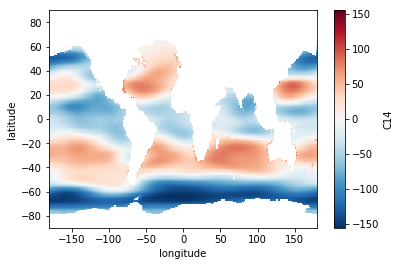

In [125]:
ds_tc.C14.plot()

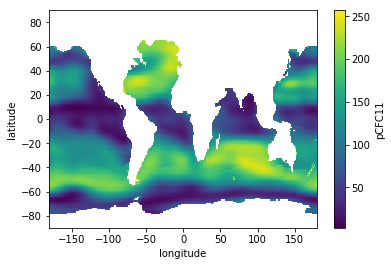

In [95]:
ds_tc.pCFC11.plot()

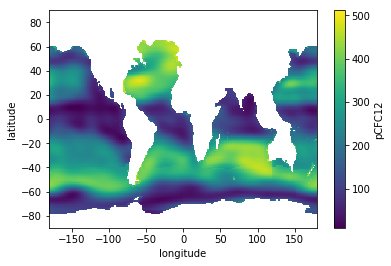

In [94]:
ds_tc.pCFC12.plot()

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 80.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0]


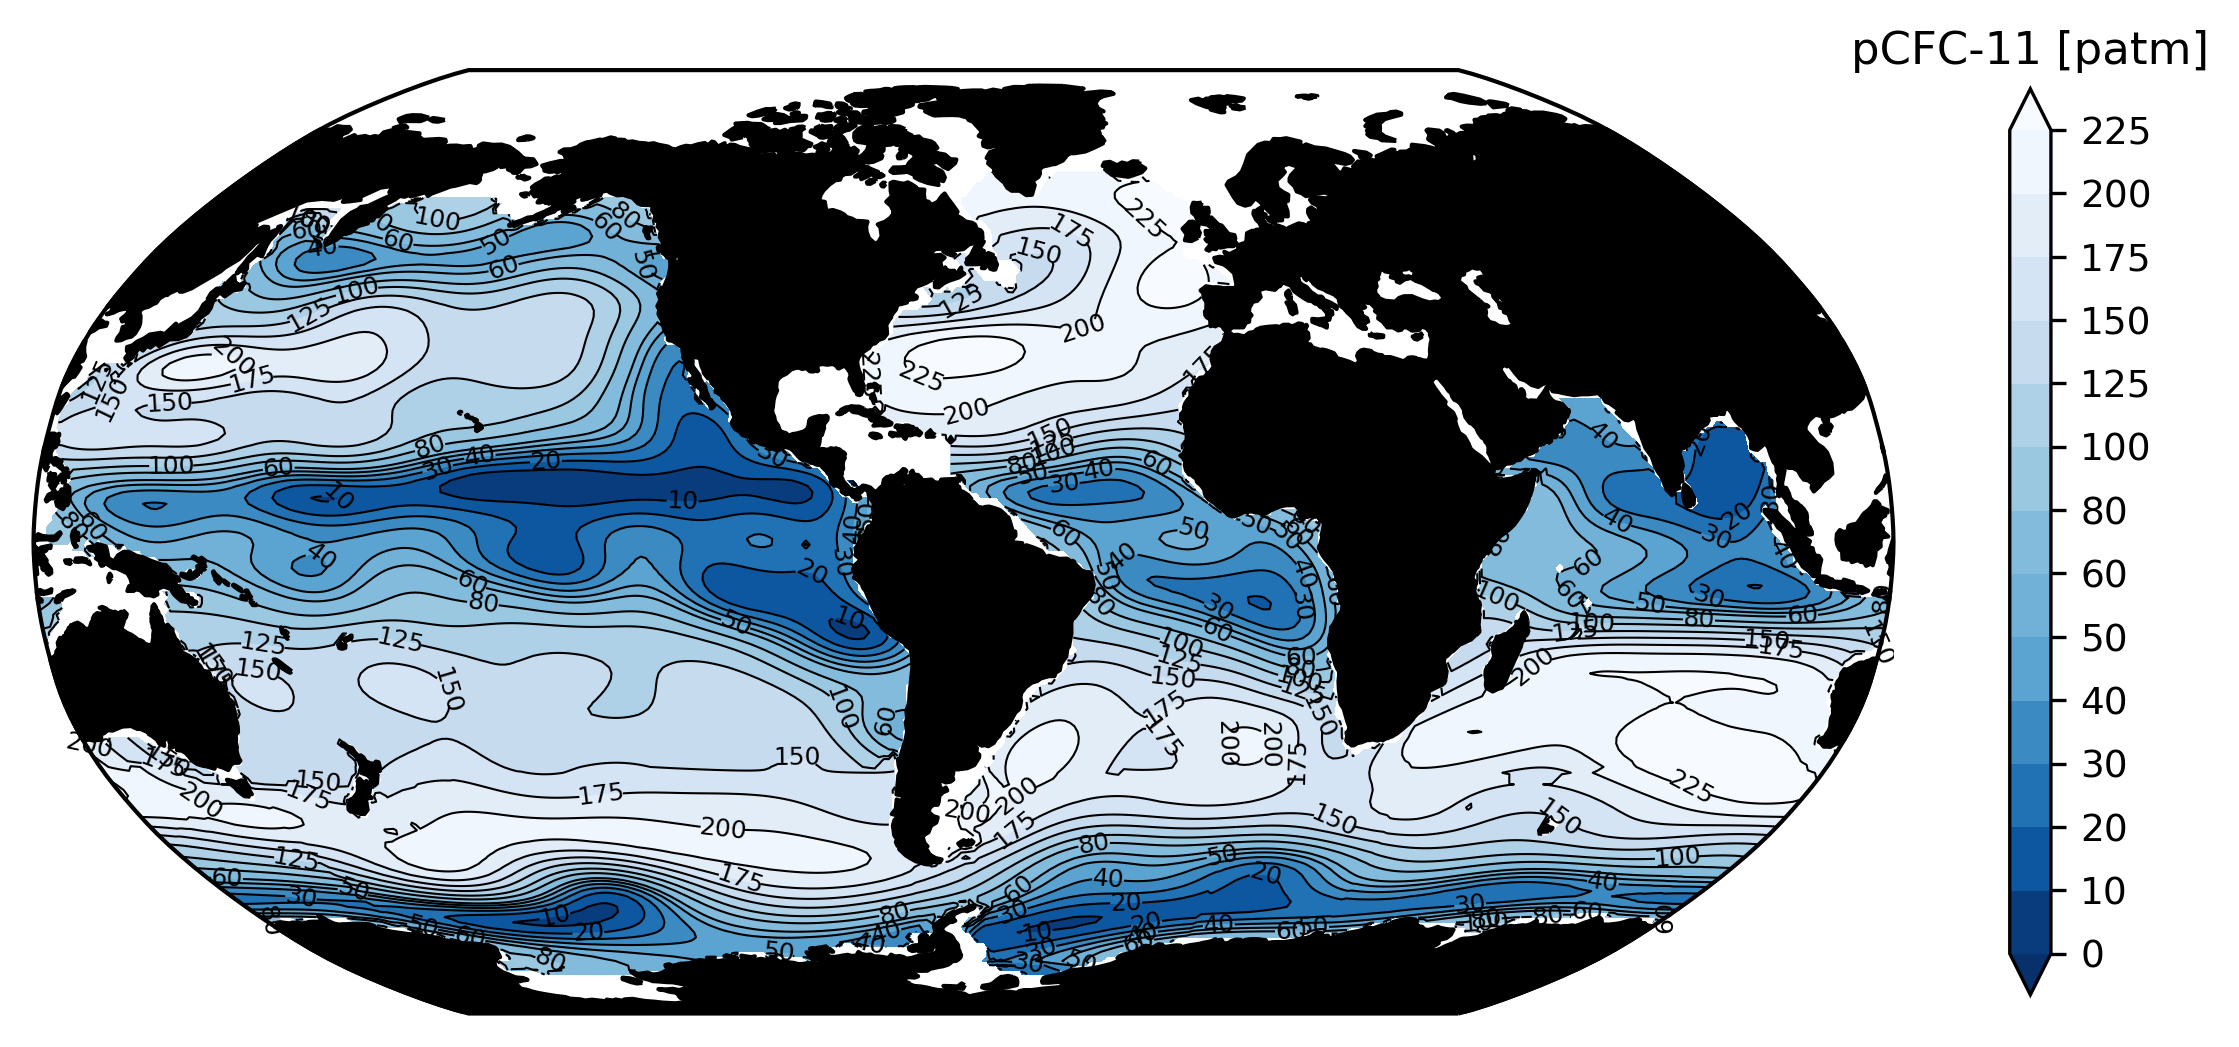

In [121]:
from cartopy.util import add_cyclic_point
import matplotlib
import matplotlib.gridspec as gridspec
reload(plot_tools)
cmap = 'Blues_r'
units = 'pCFC-11 [patm]'
levels = np.arange(0.,250.,10.) #[0.,2.,5.,10.,20.,30.,40.,50.,60.,70.,80.]
levels = [0.,10.,20.,30.,40.,50.,60.,80.,100.,125.,150.,175.,200.,225.]
print levels

lat = ds_tc.latitude.values
lon = ds_tc.longitude.values
z = ds_tc.pCFC11.values

lon = np.where(lon<0.,lon+360.,lon)
I = np.argsort(lon)
lon = lon[I]
z = z[:,I]
z,lon = add_cyclic_point(z,coord=lon)
plot_name = os.path.join(diro['fig'],'glodap-pCFC11.pdf')


fig=plt.figure(figsize=(10, 8),dpi=300)
gs = gridspec.GridSpec(1,1)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

norm = plot_tools.MidPointNorm(midpoint=50.)
contour_specs = {'levels':levels,'cmap':cmap,'extend':'both','norm':norm}
obj = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                            contour_specs,
                                            units = units,
                                            fig=fig,
                                            gridspec=gs,
                                            row=0,col=0)
plt.savefig(plot_name,bbox_inches='tight')

BkgC14
BombC14
C14


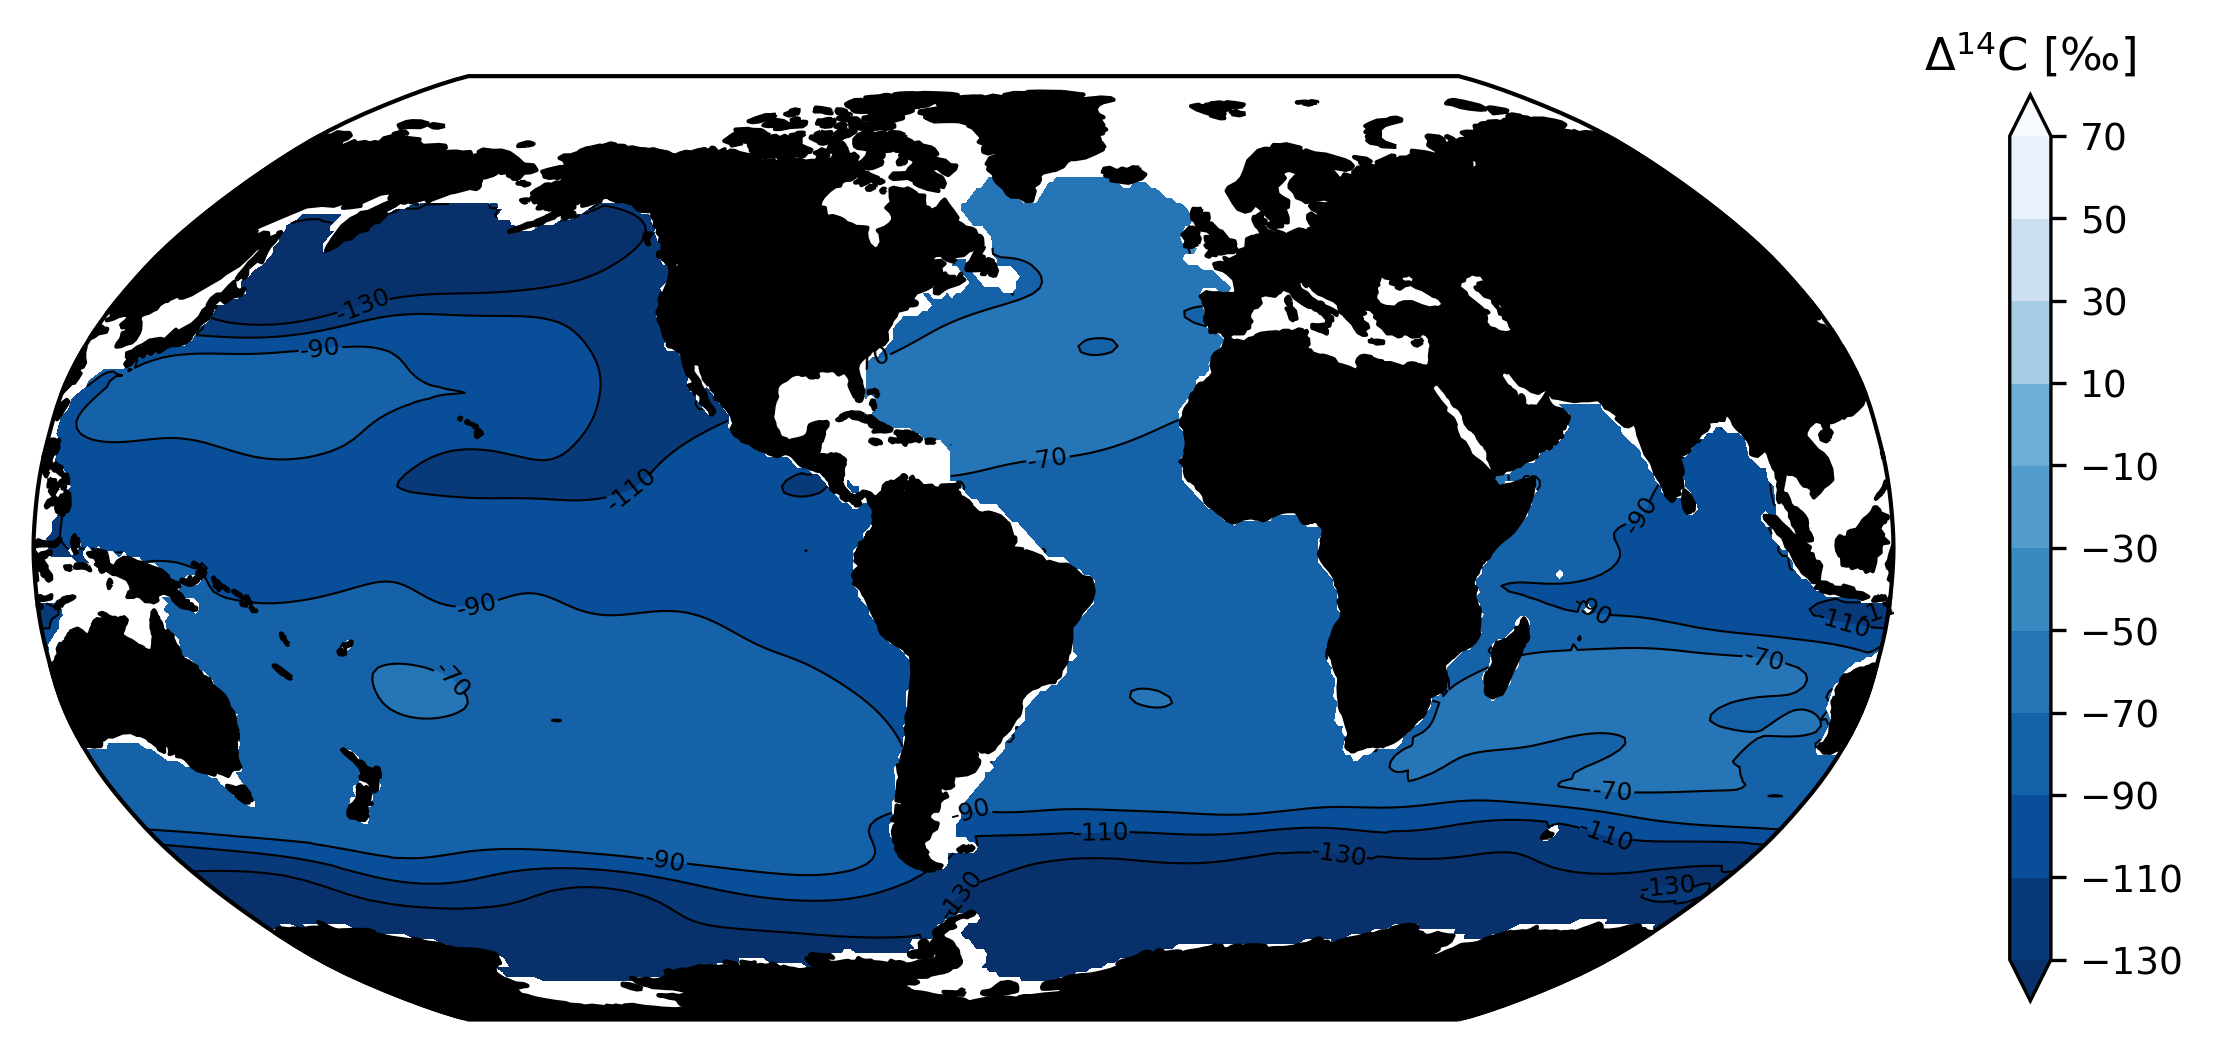

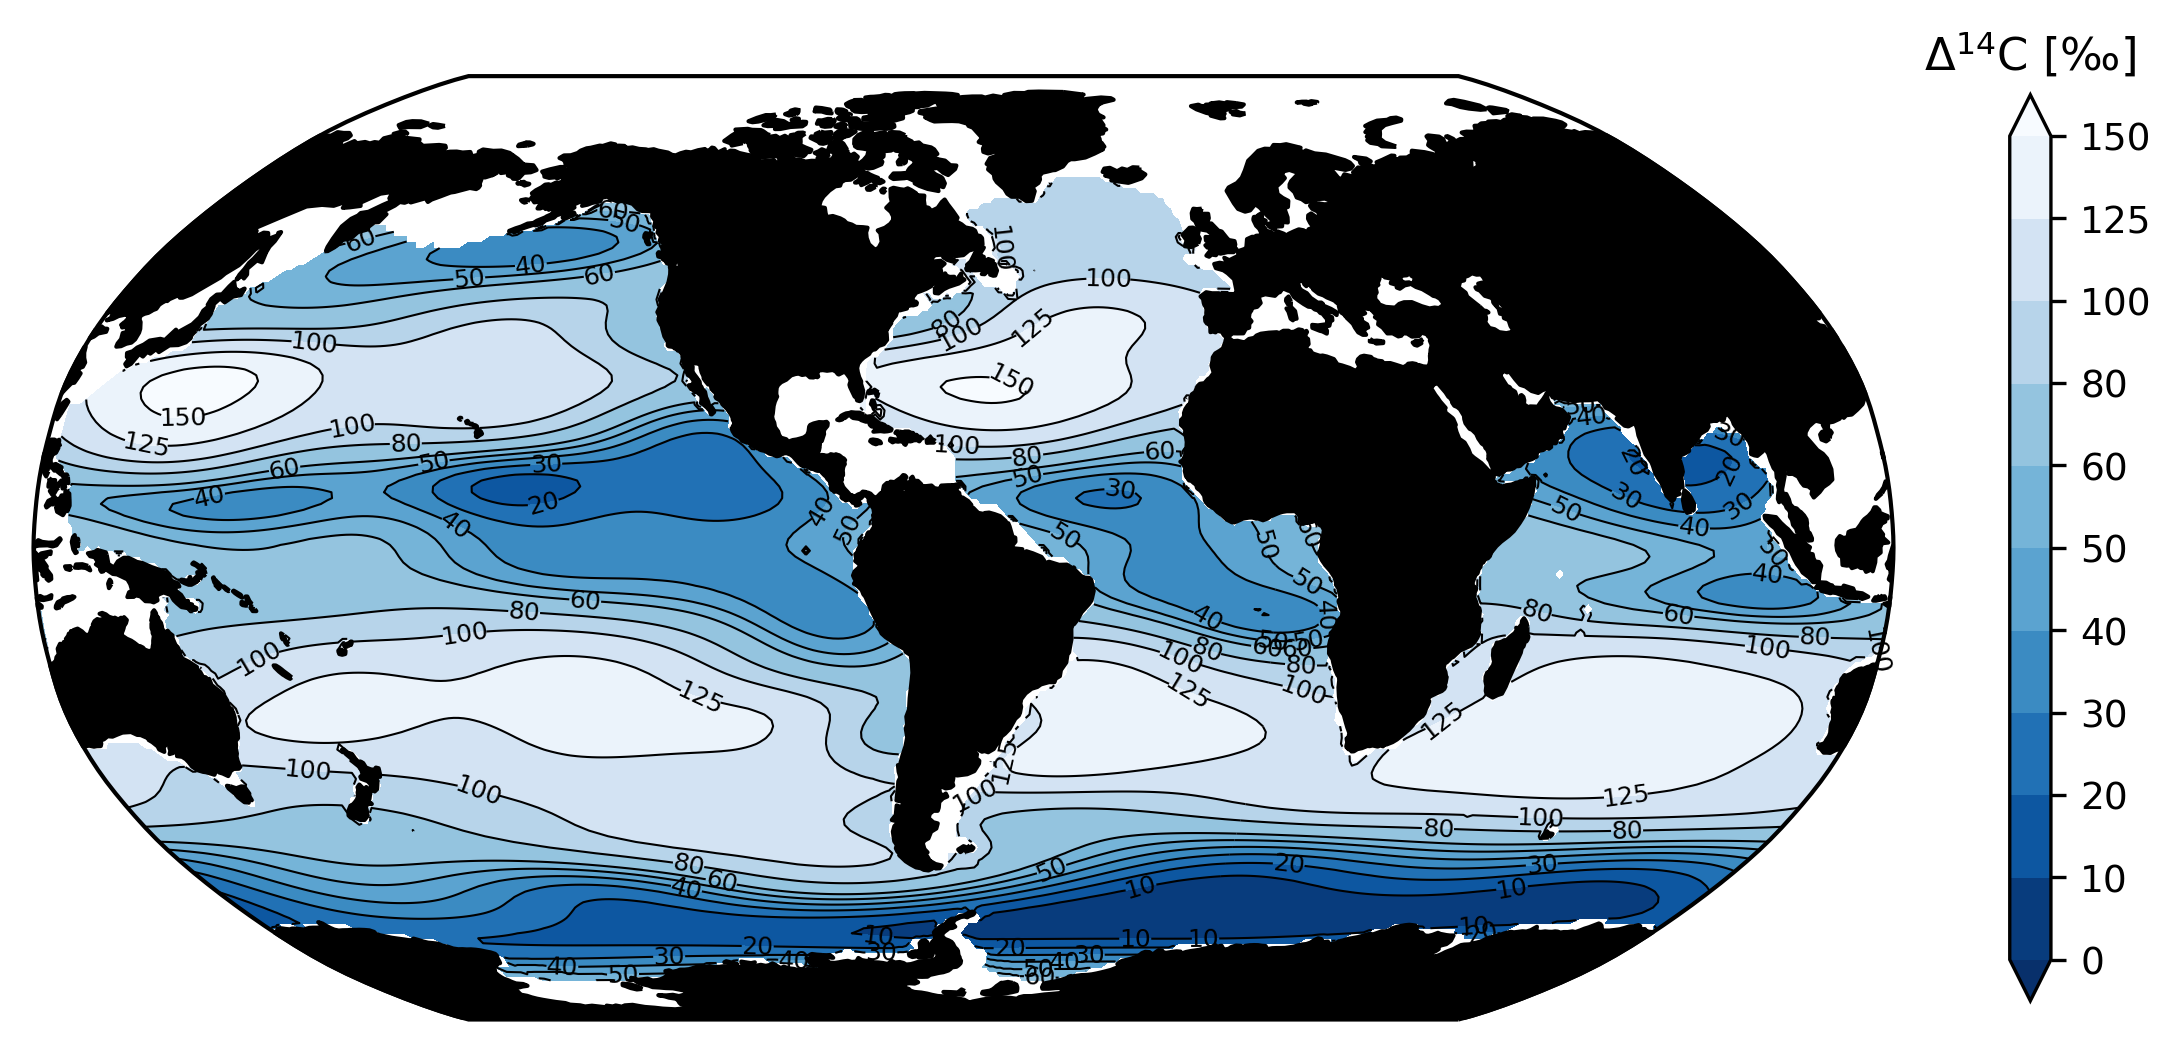

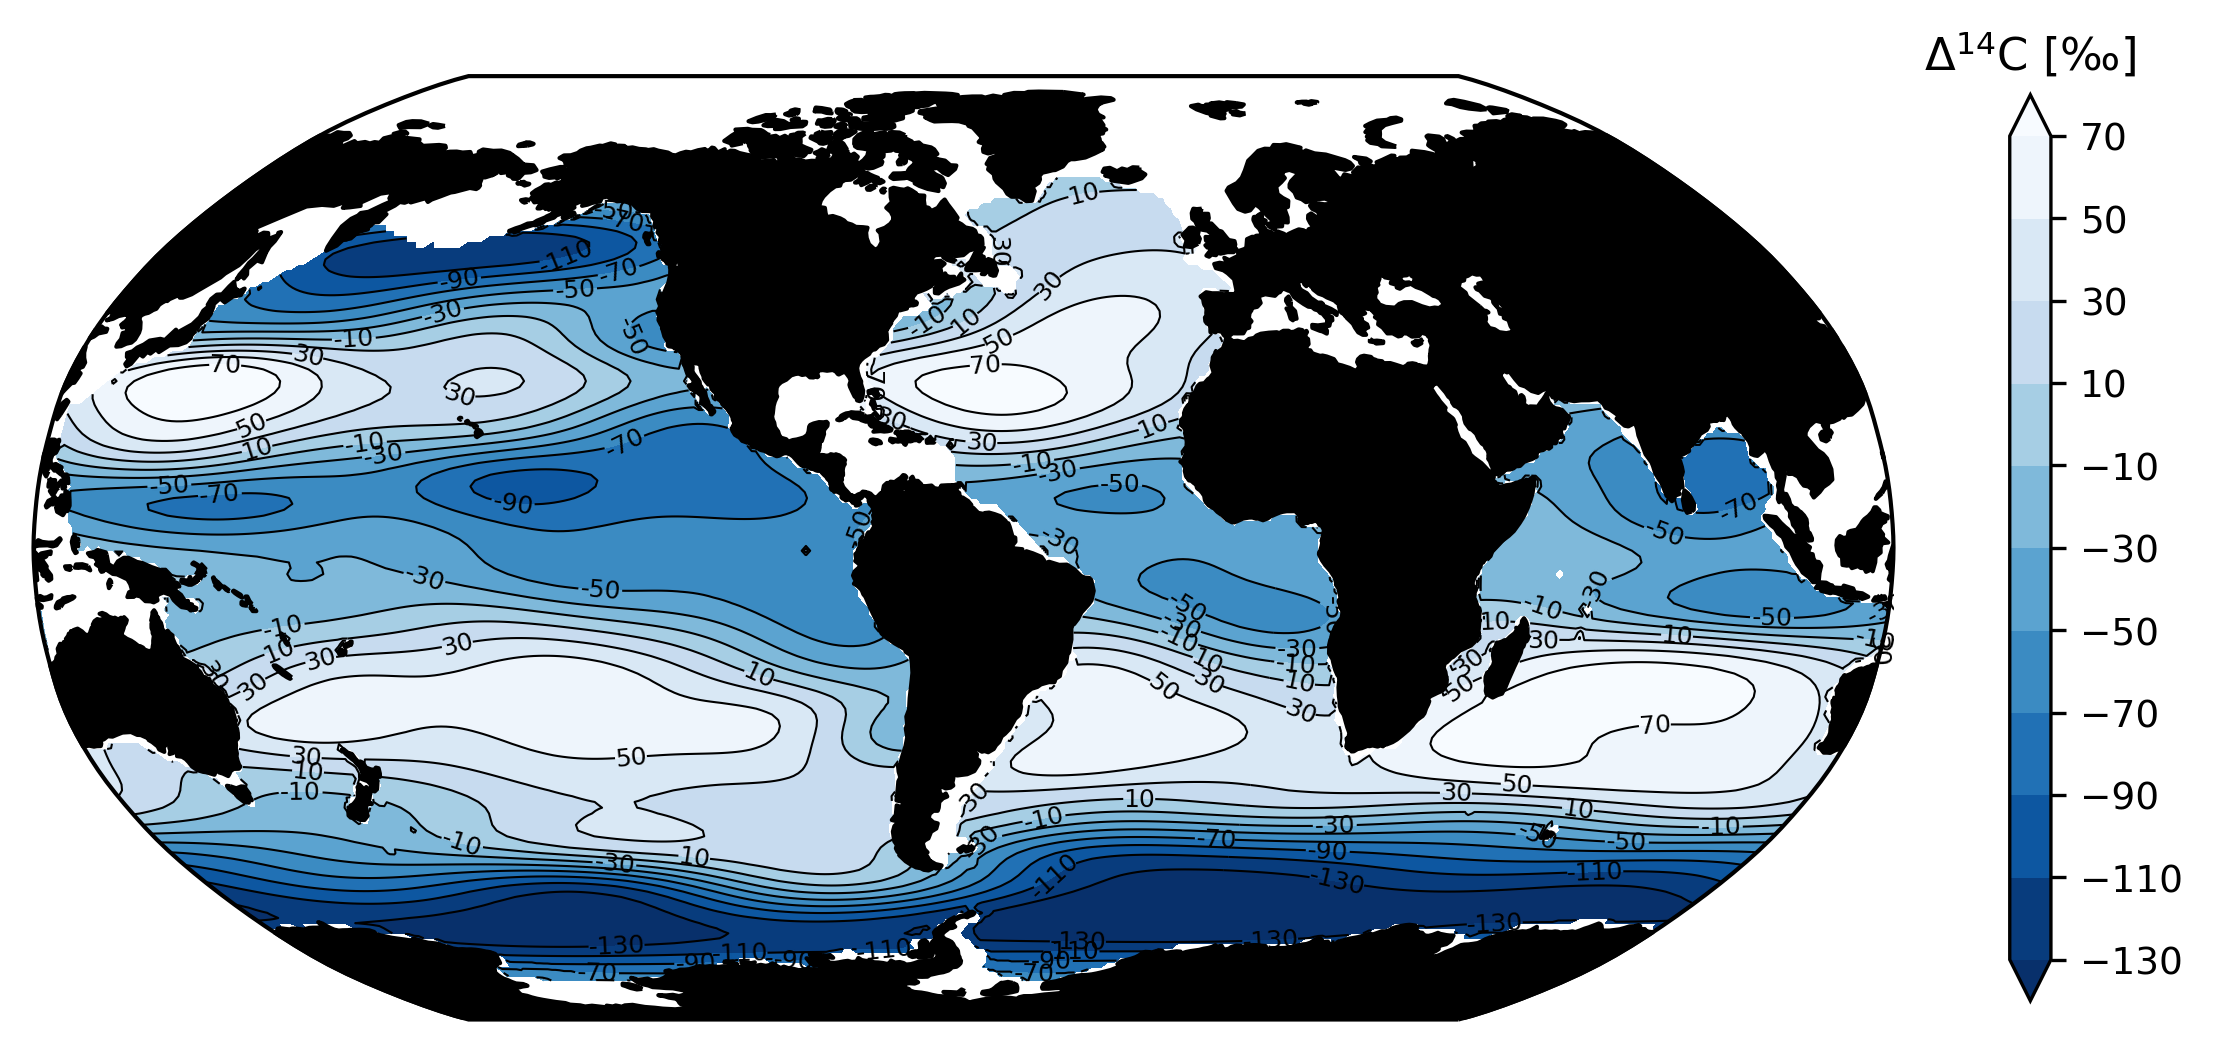

In [144]:
from cartopy.util import add_cyclic_point
import matplotlib
import matplotlib.gridspec as gridspec
reload(plot_tools)
cmap = 'Blues_r'
units = '$\Delta^{14}C$ ['+u'\u2030'+']'
levels = {'BombC14':[0.,10.,20.,30.,40.,50.,60.,80.,100.,125.,150.],
          'C14':np.arange(-130.,90.,20.),
          'BkgC14':np.arange(-130.,90.,20.)}
normr = {'BombC14':50.,
       'C14':-30,
       'BkgC14':0.}

for v in levels.keys():
    print v
    lat = ds_tc.latitude.values
    lon = ds_tc.longitude.values
    z = ds_tc[v].values

    lon = np.where(lon<0.,lon+360.,lon)
    I = np.argsort(lon)
    lon = lon[I]
    z = z[:,I]
    z,lon = add_cyclic_point(z,coord=lon)

    plot_name = os.path.join(diro['fig'],'glodap-%s.pdf'%v)

    fig=plt.figure(figsize=(10, 8),dpi=300)
    gs = gridspec.GridSpec(1,1)

    matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

    norm = plot_tools.MidPointNorm(midpoint=normr[v])
    contour_specs = {'levels':levels[v],'cmap':cmap,'extend':'both','norm':norm}
    obj = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                contour_specs,
                                                units = units,
                                                fig=fig,
                                                gridspec=gs,
                                                row=0,col=0)
    plt.savefig(plot_name,bbox_inches='tight')

[-130. -110.  -90.  -70.  -50.  -30.  -10.   10.   30.   50.   70.]


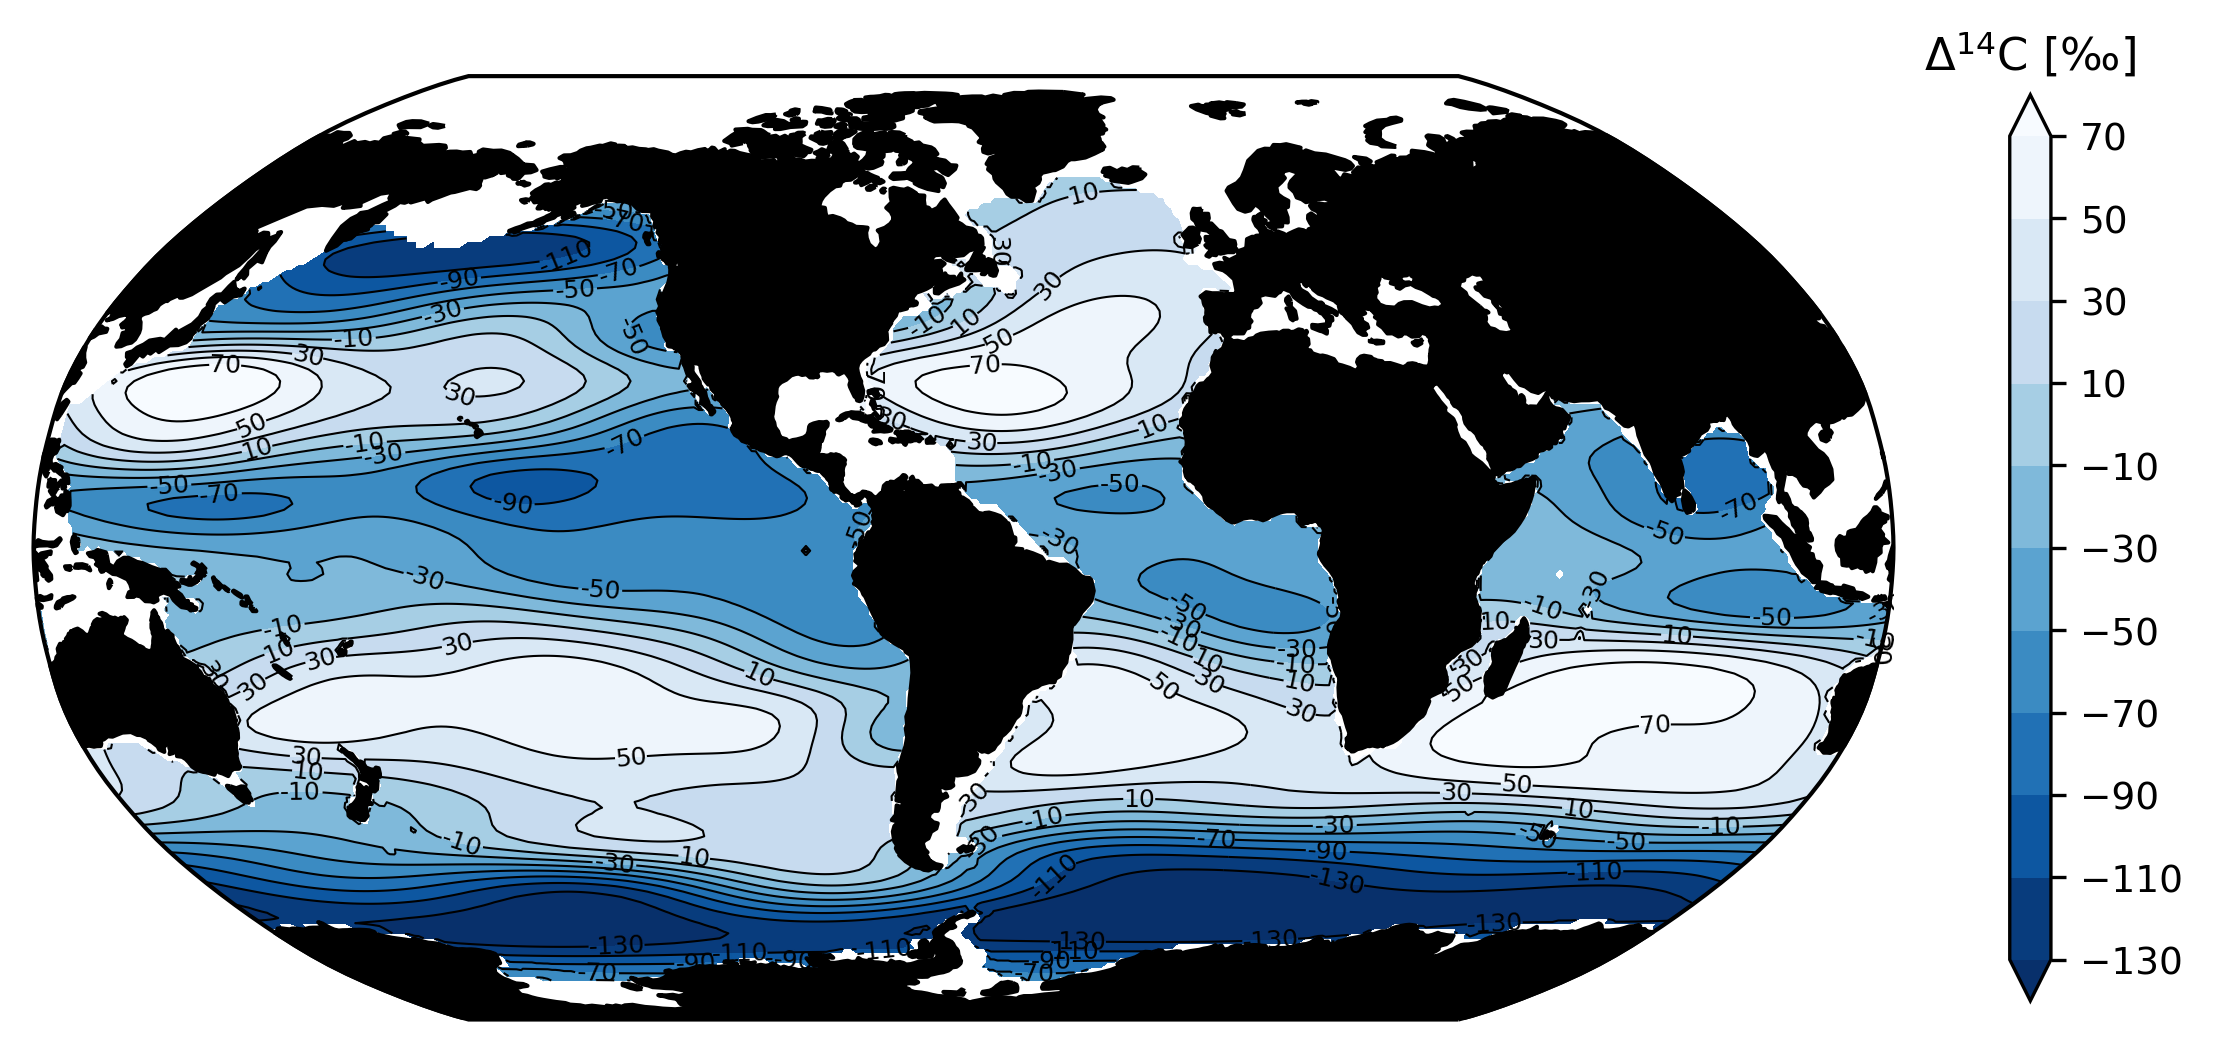

In [138]:
from cartopy.util import add_cyclic_point
import matplotlib
import matplotlib.gridspec as gridspec
reload(plot_tools)
cmap = 'Blues_r'
units = '$\Delta^{14}C$ ['+u'\u2030'+']'
levels = np.arange(-130.,90.,20.)
print levels

lat = ds_tc.latitude.values
lon = ds_tc.longitude.values
z = ds_tc.C14.values

lon = np.where(lon<0.,lon+360.,lon)
I = np.argsort(lon)
lon = lon[I]
z = z[:,I]
z,lon = add_cyclic_point(z,coord=lon)

plot_name = os.path.join(diro['fig'],'glodap-14C.pdf')

fig=plt.figure(figsize=(10, 8),dpi=300)
gs = gridspec.GridSpec(1,1)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

norm = plot_tools.MidPointNorm(midpoint=-30.)
contour_specs = {'levels':levels,'cmap':cmap,'extend':'both','norm':norm}
obj = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                            contour_specs,
                                            units = units,
                                            fig=fig,
                                            gridspec=gs,
                                            row=0,col=0)
plt.savefig(plot_name,bbox_inches='tight')